# 3-2 中阶API示范
TensorFlow的中介API主要包括各种模型层, 损失函数, 优化器, 数据管道, 特征列等等

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, losses, metrics, optimizers
import time

In [26]:
# 使用中阶段API实现一元线性回归, 并可视化  y = 2x + 3
n = 400
x = tf.random.uniform([n, 1], minval = -10, maxval = 10)
w0 = tf.constant([[2.0]])
b0 = tf.constant([[3.0]])
y = x @ w0 + b0 + tf.random.normal([n, 1], mean = 0.0, stddev = 2.0)  # 加上正态扰动

In [27]:
# hints : 这里用tuple和list得到的结果不一样
ds = tf.data.Dataset.from_tensor_slices((x, y)) \
        .shuffle(buffer_size = 1000) \
        .batch(100) \
        .prefetch(tf.data.experimental.AUTOTUNE)

# 定义优化器
opt = optimizers.Adam(learning_rate = 0.005)
linear = layers.Dense(1)
linear.build(input_shape = (1,))

@tf.function
def train(iteration_num, learning_rate = 0.01, print_loss = True):
    for i in tf.range(iteration_num):
        # mini-batch
        for x_batch, y_batch in ds:
            with tf.GradientTape() as tape:
                y_pred = linear(x_batch)
                loss = tf.reduce_mean((y_pred - y_batch)**2) / 2
            grads = tape.gradient(loss, linear.trainable_weights) # 也可以使用variables, 这是继承至Module的, 而trainable_weights是继承至layers的   
            opt.apply_gradients(zip(grads, linear.trainable_weights))
            
            if print_loss and i % 100 == 0:
                y_pred = linear(x_batch)
                tf.print("loss: ", tf.reduce_mean((y_pred - y_batch)**2) / 2)
# 训练500次
time_start = time.time()
train(500)
time_end = time.time()
tf.print(linear.trainable_weights)
print("time_cost:", time_end - time_start, "s")

loss:  124.805305
loss:  133.69278
loss:  120.836296
loss:  128.173294
loss:  22.1717205
loss:  23.2162457
loss:  19.9346924
loss:  18.5818844
loss:  3.25987792
loss:  3.32372928
loss:  3.55066466
loss:  2.88135076
loss:  1.80350983
loss:  2.37844515
loss:  2.53120184
loss:  1.87556124
loss:  1.60273504
loss:  2.47583628
loss:  2.14634299
loss:  2.26363826
[[[2.02033806]], [2.99916]]
time_cost: 24.618237018585205 s


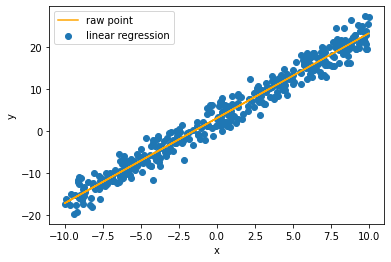

In [28]:
from matplotlib import pyplot as plt
# 绘制最后拟合的图像
%matplotlib inline
plt.scatter(x, y)
plt.plot(x, linear(x), color='orange')
plt.legend(["raw point", "linear regression"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()